In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('properati.csv')

In [43]:
data = data.drop([44685],axis=0) # elimino publicación con precio desfazado

In [44]:
# Capital Federal

lista_barrios = list(data.loc[data.state_name == 'Capital Federal','place_name'].unique())
mask_barrios_zonas = data.loc[:,'place_name'].apply(lambda distrito: distrito in lista_barrios)
data_capital = data.loc[(data.state_name == 'Capital Federal') & mask_barrios_zonas, :]

In [45]:
data_capital = data_capital.loc[:,['property_type','place_name','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2']]

In [46]:
data_capital.dtypes

property_type             object
place_name                object
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
price_usd_per_m2         float64
dtype: object

In [47]:
print(data_capital.shape[0])
data_capital.notnull().sum()

32315


property_type            32315
place_name               32315
price_aprox_usd          29017
surface_total_in_m2      26436
surface_covered_in_m2    29976
price_usd_per_m2         23433
dtype: int64

In [48]:
data_capital.notnull().sum() / data_capital.shape[0]

property_type            1.000000
place_name               1.000000
price_aprox_usd          0.897942
surface_total_in_m2      0.818072
surface_covered_in_m2    0.927619
price_usd_per_m2         0.725143
dtype: float64

In [49]:
# Limpio los datos

data_capital_clean = data_capital.dropna()

In [50]:
print(data_capital_clean.shape[0])
data_capital_clean.notnull().sum() / data_capital_clean.shape[0]

22318


property_type            1.0
place_name               1.0
price_aprox_usd          1.0
surface_total_in_m2      1.0
surface_covered_in_m2    1.0
price_usd_per_m2         1.0
dtype: float64

#### Correlaciones con datos vacíos (en cualquier columna) eliminados

In [51]:
# Correlación m2 vs usd -> Dptos

data_capital_clean.loc[data_capital_clean.property_type == 'apartment',['surface_total_in_m2','price_aprox_usd']].corr()

,surface_total_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.698344
price_aprox_usd,0.698344,1.000000


In [52]:
# Correlación m2 vs usd -> Casa

data_capital_clean.loc[data_capital_clean.property_type == 'house',['surface_total_in_m2','price_aprox_usd']].corr()

,surface_total_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.583546
price_aprox_usd,0.583546,1.000000


In [53]:
# Correlación m2 vs usd -> Store

data_capital_clean.loc[data_capital_clean.property_type == 'store',['surface_total_in_m2','price_aprox_usd']].corr()

,surface_total_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.780321
price_aprox_usd,0.780321,1.000000


In [54]:
# Correlación m2 vs usd -> Store

data_capital_clean.loc[data_capital_clean.property_type == 'PH',['surface_total_in_m2','price_aprox_usd']].corr()

,surface_total_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.775339
price_aprox_usd,0.775339,1.000000


In [55]:
data_capital_clean_dpto = data_capital_clean.loc[data_capital_clean.property_type == 'apartment']

In [56]:
round(data_capital_clean_dpto.groupby('place_name')['price_aprox_usd'].mean().sort_values(ascending=False),2)

place_name
Puerto Madero    925921.72
Palermo Chico    846538.61
Catalinas        550000.00
San Cristobal    443423.21
Recoleta         411337.49
                   ...    
Paternal         104081.84
Pompeya           98200.00
Villa Lugano      89538.74
Constitución      87934.34
Villa Soldati     74666.67
Name: price_aprox_usd, Length: 61, dtype: float64

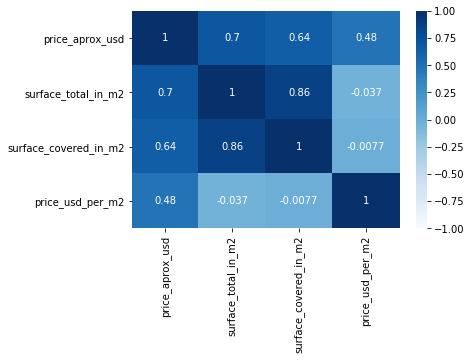

In [57]:
sns.heatmap(data_capital_clean_dpto.corr(), annot=True, vmin=-1, cmap='Blues');

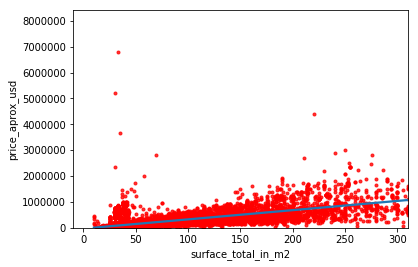

In [58]:
sns.regplot(data_capital_clean_dpto.surface_total_in_m2, data_capital_clean_dpto.price_aprox_usd, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

# Machine Learning
## Supervisado
### Regresión (precio)
#### Variable continua

In [59]:
import seaborn as sns

In [60]:
data_capital_clean_dpto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19011 entries, 2 to 121219
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          19011 non-null  object 
 1   place_name             19011 non-null  object 
 2   price_aprox_usd        19011 non-null  float64
 3   surface_total_in_m2    19011 non-null  float64
 4   surface_covered_in_m2  19011 non-null  float64
 5   price_usd_per_m2       19011 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.0+ MB


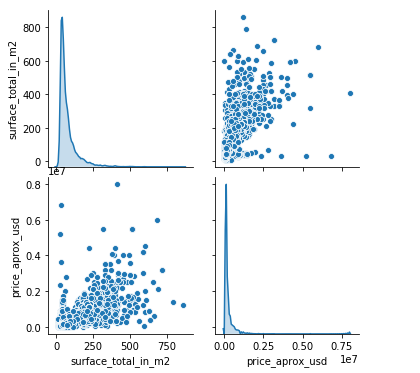

In [61]:
sns.pairplot(data_capital_clean_dpto.loc[:,['surface_total_in_m2','price_aprox_usd']],diag_kind='kde')

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
# instancio el modelo con sus hiperparámetros
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# acondiciono los datos del input

# matriz de features -> array 2D o un DataFrame, vector objetivo -> array 1D o Series

# X e y
feature_cols = ['surface_total_in_m2']
X = data_capital_clean_dpto[feature_cols] #  array 2D de Numpy o un DataFrame de Pandas
y = data_capital_clean_dpto.price_aprox_usd # array 1D de Numpy o una Series de Pandas

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (19011, 1)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (19011,)
Type y: <class 'pandas.core.series.Series'>


In [65]:
# separar los sets de entrenamiento y de testeo

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, shuffle=True,test_size=0.25, train_size=0.5)

In [66]:
# entrenar el modelo

model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Los atributos que representan los parámetros de 
los modelos aprendidos se identifican con underscores -> los valores de 𝛽0^ y 𝛽1^ 
aprendidos inspeccionando los atributos intercept_ y coef_'

In [67]:
model.coef_

array([3575.31252945])

In [68]:
model.intercept_

-27078.309146166197

In [69]:
# predicción manual

test = 60
model.intercept_ + model.coef_*test

array([187440.44262094])

In [70]:
# predicción con método

test = 60
model.intercept_ + model.coef_*test

array([187440.44262094])

In [71]:
# Usando el método del objeto

print(np.array(test).reshape(-1,1))
test_sklearn = np.array(test).reshape(-1,1) # test es un único valor de prueba (no una matriz)
model.predict(test_sklearn)

[[60]]


array([187440.44262094])

In [72]:
ypred = model.predict(Xtest)
ypred

array([ 87331.69179629, 140961.37973807, 273247.94332778, ...,
       405534.5069175 , 409109.81944695, 144536.69226752])

**Considerando un metraje total de 60 m2 para un dpto. en capital, nuestro modelo estima un valor de USD 187.440.-**

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 101710.48
MSE: 56332604006.62
RMSE: 237344.91
R2: 0.49


#### Cross-validation
Cada valor indica el score que se obtuvo sobre el set de validación de una prueba en particular. Como se trata de un problema de regresión, el score por defecto es el 𝑅2.

In [74]:
# Importamos la función cross_val_score del módulo de selección de modelos
from sklearn.model_selection import cross_val_score

# La ejecutamos indicando como estimador una regresión lineal, especificando el set de train y cuántos folds queremos
cross_val_score(estimator=LinearRegression(fit_intercept=True), X=Xtrain, y=ytrain, cv=4)

array([0.47971423, 0.50970455, 0.45441695, 0.4618722 ])

### Clasificación (Barrio)
#### Variable categórica /  discreta

In [75]:
# data_capital_clean_dpto['price_aprox_usd'].quantile([.0,.25,.5,.75]) 
# -> no sirve, toma sólo un valor (el de referencia)

In [76]:
# divido en cuartiles para tomar un barrio (el mas repetido) por cuartil

pd.qcut(data_capital_clean_dpto['price_aprox_usd'],10).sort_values().value_counts()

(94100.0, 110000.0]              1986
(179000.0, 230000.0]             1949
(148770.0, 179000.0]             1938
(5103.6089999999995, 78800.0]    1904
(548600.0, 8000000.0]            1901
(126826.0, 148770.0]             1901
(78800.0, 94100.0]               1901
(319000.0, 548600.0]             1896
(230000.0, 319000.0]             1821
(110000.0, 126826.0]             1814
Name: price_aprox_usd, dtype: int64

In [77]:
data_capital_clean_dpto['interval'] = pd.qcut(data_capital_clean_dpto.loc[:,'price_aprox_usd'],15)

/home/guido/anaconda3/envs/dh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
data_capital_clean_dpto.groupby('interval')['place_name'].describe()

,count,unique,top,freq
interval,,,,
"(5103.6089999999995, 73000.0]",1319,53,Boedo,159
"(73000.0, 84000.0]",1261,54,San Telmo,143
"(84000.0, 94100.0]",1225,53,Caballito,132
"(94100.0, 105000.0]",1324,54,Belgrano,119
"(105000.0, 115000.0]",1261,54,Caballito,130
"(115000.0, 126826.0]",1215,54,Caballito,148
"(126826.0, 140000.0]",1359,54,Caballito,141
"(140000.0, 157894.42]",1175,51,Belgrano,123
"(157894.42, 179000.0]",1305,54,Belgrano,138


In [79]:
# tomo los barrios "top" por cuartil
# me quedo con sólo DOS -> clasificación dicotómica

barrios_top = list(data_capital_clean_dpto.groupby('interval')['place_name'].describe()['top'].unique())
print(barrios_top[:2])

['Boedo', 'San Telmo']


In [80]:
barrios_mask = data_capital_clean_dpto.place_name.apply(lambda x: x in barrios_top[:2])

In [81]:
barrios_clean_dptos = data_capital_clean_dpto.loc[barrios_mask,:]

In [82]:
# elimino las columnas inutiles

barrios_clean_dptos = barrios_clean_dptos.loc[:,:'surface_total_in_m2']

In [83]:
barrios_clean_dptos.head(10), barrios_clean_dptos.shape

(     property_type place_name  price_aprox_usd  surface_total_in_m2
 35       apartment      Boedo         145000.0                 80.0
 403      apartment  San Telmo         108356.0                 41.0
 637      apartment  San Telmo          94000.0                 55.0
 739      apartment      Boedo         289000.0                228.0
 740      apartment      Boedo         289000.0                228.0
 741      apartment      Boedo         289000.0                228.0
 5197     apartment  San Telmo          88000.0                 38.0
 5233     apartment  San Telmo         170000.0                 54.0
 6482     apartment      Boedo          75000.0                 33.0
 6771     apartment  San Telmo         110000.0                 54.0,
 (1630, 4))

In [84]:
# variables dummies de los atributos categóricos

barrios_clean_dptos_dum = pd.get_dummies(barrios_clean_dptos, drop_first=True)
print(barrios_clean_dptos_dum.head(10))

      price_aprox_usd  surface_total_in_m2  place_name_San Telmo
35           145000.0                 80.0                     0
403          108356.0                 41.0                     1
637           94000.0                 55.0                     1
739          289000.0                228.0                     0
740          289000.0                228.0                     0
741          289000.0                228.0                     0
5197          88000.0                 38.0                     1
5233         170000.0                 54.0                     1
6482          75000.0                 33.0                     0
6771         110000.0                 54.0                     1


In [85]:
print(barrios_clean_dptos_dum.describe())

       price_aprox_usd  surface_total_in_m2  place_name_San Telmo
count     1.630000e+03          1630.000000           1630.000000
mean      2.350935e+05            46.685276              0.556442
std       3.258920e+05            38.039845              0.496957
min       2.240000e+04            13.000000              0.000000
25%       7.851720e+04            30.000000              0.000000
50%       1.243707e+05            35.000000              1.000000
75%       2.651341e+05            51.000000              1.000000
max       6.809000e+06           404.000000              1.000000


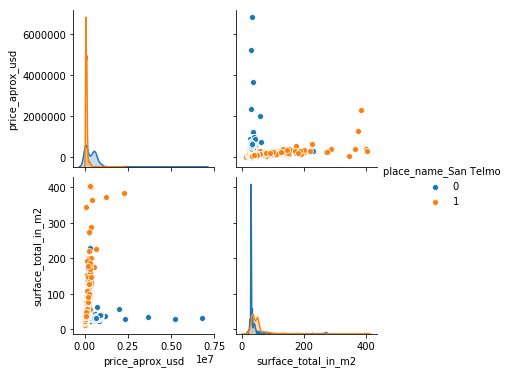

In [86]:
sns.pairplot(barrios_clean_dptos_dum, hue='place_name_San Telmo', diag_kind='auto');

In [87]:
# modelo e hiperparámetros

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [88]:
# Creamos X e y

feature_cols = ['surface_total_in_m2', 'price_aprox_usd']
X = barrios_clean_dptos_dum[feature_cols]
y = barrios_clean_dptos_dum.loc[:,'place_name_San Telmo']

print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (1630, 2)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (1630,)
Type y: <class 'pandas.core.series.Series'>


In [89]:
# separo training de testeo

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1,train_size=0.5, test_size=0.2)

In [90]:
Xtrain, Xtest

(        surface_total_in_m2  price_aprox_usd
 105336                 35.0        105493.39
 25629                  30.0        168500.00
 61674                  75.0        170000.00
 105168                 35.0         88051.37
 116927                 31.0        100000.00
 ...                     ...              ...
 85524                  64.0        168822.35
 77621                  85.0        155000.00
 89882                  43.0         74800.00
 86239                  97.0        295163.34
 26091                  30.0         37000.00
 
 [815 rows x 2 columns],
         surface_total_in_m2  price_aprox_usd
 86040                  41.0        138311.82
 117014                 36.0         36943.00
 26487                  30.0        453900.00
 88299                  45.0        165000.00
 25648                  30.0        175200.00
 ...                     ...              ...
 105156                 32.0         80367.90
 85749                  41.0        125738.03
 75735 

In [91]:
# entreno el modelo con los datos de entrenamiento

model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [92]:
ypred = model.predict(Xtest)
ypred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred)

0.7423312883435583

#### Cross-validation

In [94]:
# Importamos la función cross_val_score del módulo de selección de modelos
from sklearn.model_selection import cross_val_score

# La ejecutamos indicando como estimador una regresión lineal, especificando el set de train y cuántos folds queremos
cross_val_score(estimator= GaussianNB(), X=Xtrain, y=ytrain, cv=3)

array([0.79779412, 0.78308824, 0.80073801])

## No Supervisado
### Clustering

In [95]:
# nueva máscara para 6 clusters

print(barrios_top, len(barrios_top),'\n')

barrios_mask_2 = data_capital_clean_dpto.place_name.apply(lambda x: x in barrios_top)

# extraigo los 6 barrios y elimino columnas inútiles
barrios_clean_dptos_2 = data_capital_clean_dpto.loc[barrios_mask_2,'place_name':'surface_total_in_m2']

print(barrios_clean_dptos_2)

['Boedo', 'San Telmo', 'Caballito', 'Belgrano', 'Palermo', 'Puerto Madero'] 6 

       place_name  price_aprox_usd  surface_total_in_m2
7        Belgrano         138000.0                 45.0
8        Belgrano         195000.0                 65.0
19        Palermo         350000.0                104.0
21        Palermo         270500.0                118.0
35          Boedo         145000.0                 80.0
...           ...              ...                  ...
121112      Boedo         115000.0                 49.0
121113    Palermo         265000.0                100.0
121146    Palermo         350000.0                 95.0
121157   Belgrano         128000.0                 38.0
121215   Belgrano         870000.0                113.0

[7141 rows x 3 columns]


In [96]:
barrios_clean_dptos_2.describe()

,price_aprox_usd,surface_total_in_m2
count,7.141000e+03,7141.000000
mean,3.073209e+05,81.367596
std,3.890152e+05,69.984748
min,1.170634e+04,10.000000
25%,1.140000e+05,38.000000
50%,1.750000e+05,55.000000
75%,3.500000e+05,96.000000
max,6.809000e+06,860.000000


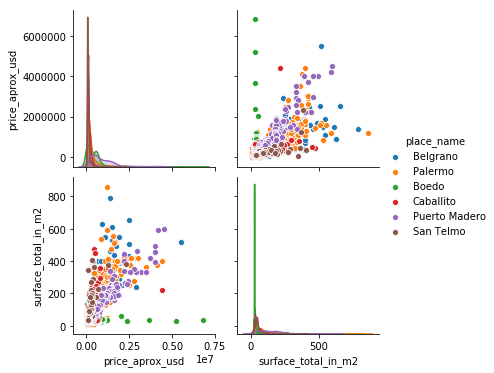

In [97]:
sns.pairplot(barrios_clean_dptos_2, hue='place_name', diag_kind='auto');

In [98]:
# seleccionamos el modelo y los hiperparámetros

from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, random_state=0)

In [99]:
# se acondicona la matriz de features -descartando la variable objetivo-

X_data = barrios_clean_dptos_2.drop('place_name', axis=1)
print(X_data)
X_data.shape

        price_aprox_usd  surface_total_in_m2
7              138000.0                 45.0
8              195000.0                 65.0
19             350000.0                104.0
21             270500.0                118.0
35             145000.0                 80.0
...                 ...                  ...
121112         115000.0                 49.0
121113         265000.0                100.0
121146         350000.0                 95.0
121157         128000.0                 38.0
121215         870000.0                113.0

[7141 rows x 2 columns]


(7141, 2)

In [100]:
# Dado que K-Means es un algoritmo que trabaja calculando distancias, un paso previo al ajuste del modelo consiste en estandarizar los valores
# para eliminar posibles inconvenientes asociados a la escala de las distintas variables

# un transformador de los datos que reescala las variables para que tengan media 0 y desvío estándar 1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [101]:
X = scaler.transform(X_data)
X[0:5]

array([[-0.43528579, -0.51968669],
       [-0.2887517 , -0.23389013],
       [ 0.10971819,  0.32341317],
       [-0.0946583 ,  0.52347076],
       [-0.41729038, -0.01954271]])

In [102]:
print('Medias reescaladas:', np.mean(X, axis=0).round(2)) # por columna
print('Desvíos reescalados:', np.std(X, axis=0).round(2))

Medias reescaladas: [ 0. -0.]
Desvíos reescalados: [1. 1.]


In [103]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [104]:
y_km = model.predict(X)
y_km[:50]

array([2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 5, 2, 2, 2, 3, 2, 3, 5, 3, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 5, 5, 3, 2,
       3, 1, 2, 5, 3, 3], dtype=int32)

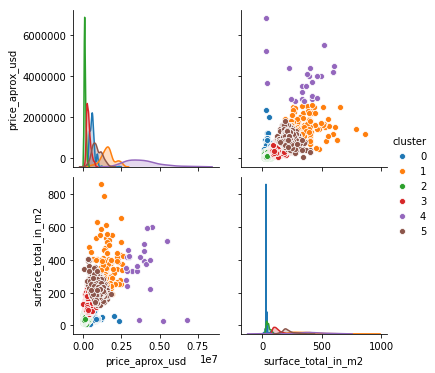

In [105]:
# Visualizamos los resultados

X_data['cluster'] = y_km

sns.pairplot(X_data, hue='cluster');

**Los pairplots son bastante diferentes**

In [106]:
# Importamos la función cross_val_score del módulo de selección de modelos
from sklearn.model_selection import cross_val_score

# La ejecutamos indicando como estimador una regresión lineal, especificando el set de train y cuántos folds queremos
cross_val_score(estimator= KMeans(n_clusters=6, random_state=0), X=Xtrain, y=ytrain, cv=3)

array([-2.63311222e+13, -1.95487558e+12, -9.34476621e+11])

**Los resultados son lamentables**

### Reducción de la dimensionalidad

La tarea de reducción de la dimensionalidad es investigar si hay una representación apropiada de baja dimensionalidad que retiene las características esenciales de los datos originales. Las técnicas de reducción de la dimensionalidad buscan obtener a partir de un dataset complejo, con numerosas variables (alta dimensionalidad), una representación en una menor cantidad de variables (baja dimensionalidad) que de alguna manera preserve cualidades relevantes del dataset original.

In [1]:
### necesario retrotraerse al dataset original